<a href="https://colab.research.google.com/github/shayar/ProblemSolvingwithDataScience/blob/adding-titanic-dataset/Logistic_regression_tianic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Logistic regression** is a form of supervised machine learning algorithm that uses a sigmoid funcation to do binary classification.

**Titanic dataset** is a dataset with different columns representing circumstances that could be used to predict which passenger had a higher survival probability.

We will use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.




---



## Importing Important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data acquisition

we used seaborn to import our dataset

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## Data Cleaning and Pre-preprocessing

In [ ]:
df = titanic.copy()

Because deck has too many missing values, we will remove it.

In [ ]:
df.drop('deck', axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


We also have a lot of repeating columns lets check if they have the same data.

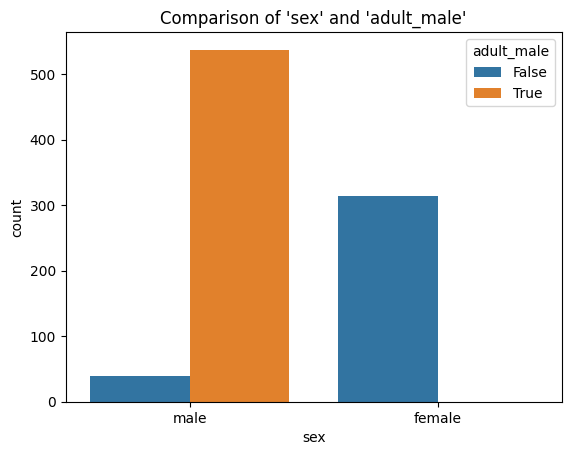

In [ ]:
sns.countplot(data=df, x='sex', hue='adult_male')
plt.title("Comparison of 'sex' and 'adult_male'")
plt.show()

In [ ]:
# checking if adult_male accounted for children and teenagers

print(df.loc[(df['age'] < 16) & (df['sex'] == 'male')])

     survived  pclass   sex    age  sibsp  parch      fare embarked   class  \
7           0       3  male   2.00      3      1   21.0750        S   Third   
16          0       3  male   2.00      4      1   29.1250        Q   Third   
50          0       3  male   7.00      4      1   39.6875        S   Third   
59          0       3  male  11.00      5      2   46.9000        S   Third   
63          0       3  male   4.00      3      2   27.9000        S   Third   
78          1       2  male   0.83      0      2   29.0000        S  Second   
125         1       3  male  12.00      1      0   11.2417        C   Third   
164         0       3  male   1.00      4      1   39.6875        S   Third   
165         1       3  male   9.00      0      2   20.5250        S   Third   
171         0       3  male   4.00      4      1   29.1250        Q   Third   
182         0       3  male   9.00      4      2   31.3875        S   Third   
183         1       2  male   1.00      2      1   3

found 40ish people were under 16 males labled false.

In [ ]:
def compare_columns(df, col1, col2):

  return (df[col1] == df[col2]).all()

In [ ]:
 # checking sex and who columns have the same values

 print(f"Are 'sex' and 'who' columns the same? {compare_columns(df, 'sex', 'who')}")

Are 'sex' and 'who' columns the same? False


Removing embark_town as it has the same values in embarked.

In [ ]:
df.drop('embark_town', axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [ ]:
# same value as survived

df.drop('alive', axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [ ]:
def median_age(df, col, val):
  filter_col = df[df['who'] == val]
  return filter_col[col].median()

### Fixing missing values in age column for men

In [ ]:
m_median_age = median_age(df, 'age', 'man')

In [ ]:
m_median_age

30.0

In [ ]:
df.loc[df['who'] == 'man', 'age'] = df.loc[df['who'] == 'man', 'age'].fillna(m_median_age)

df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,53
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### Fixing Missing values for women now

In [ ]:
f_median_age = median_age(df, 'age', 'woman')
f_median_age

30.0

In [ ]:
df.loc[df['who'] == 'woman', 'age'] = df.loc[df['who'] == 'woman', 'age'].fillna(f_median_age)

df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['embarked'].mode()[0]

'S'

In [ ]:
# Because embarked is a categorical feature, we will use the mode to fill in the missing values.
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipython-input-180-554626568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


## Checking Outliers

In [ ]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numerical_cols

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [ ]:
# Looping over each columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print("-" * 30)

Column: survived
Number of outliers: 0
------------------------------
Column: pclass
Number of outliers: 0
------------------------------
Column: age
Number of outliers: 66
------------------------------
Column: sibsp
Number of outliers: 46
------------------------------
Column: parch
Number of outliers: 213
------------------------------
Column: fare
Number of outliers: 116
------------------------------


## Handling Age outlier by Capping the upper limit to 80

In [ ]:
# Capping the age upper limit to 80 for handling age outliers
df['age'] = np.where(df['age'] > 80, 80, df['age'])

## Handling Sibsp by removing the rows as it is only 4% of the total data set

In [ ]:

# Calculating quartiles and IQR for the 'bmi' column
Q1_sibsp = df['sibsp'].quantile(0.25)
Q3_sibsp = df['sibsp'].quantile(0.75)
IQR_sibsp = Q3_sibsp - Q1_sibsp

# Defining bounds for outlier detection
lower_bound_sibsp = Q1_sibsp - 1.5 * IQR_sibsp
upper_bound_sibsp = Q3_sibsp + 1.5 * IQR_sibsp

print(f"Original number of rows before filtering Sibsp outliers: {df.shape[0]}")

# Filtering out outliers in the 'bmi' column
df = df[(df['sibsp'] >= lower_bound_sibsp) & (df['sibsp'] <= upper_bound_sibsp)]

# Print the number of rows before and after outlier removal
print(f"Number of rows after removing 'Sibsp' outliers: {df.shape[0]}")



Original number of rows before filtering Sibsp outliers: 891
Number of rows after removing 'Sibsp' outliers: 845


## Handling Parch outlier by Capping the upper limit to 3

In [ ]:
# Capping the parch upper limit to 3 for handling parch outliers
df['parch'] = np.where(df['parch'] > 3, 3, df['parch'])

/tmp/ipython-input-185-10722768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parch'] = np.where(df['parch'] > 3, 3, df['parch'])


# Model Training

### Converting all the categorical data using One hot encoding

In [ ]:
# Performing one hot encoding on categorical data
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who'], drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0,3,22.0,1,0,7.2500,True,False,True,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,True,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,True,False,True,True,False


## Defining Features and Target

In [ ]:
# Splitting the data into Features and Target
X = df.drop('survived', axis=1)
y = df['survived']

Now, splitting the data set to train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we will be doing feature scaling.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

So, now we will train the logistic regression model.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

So, as the model is created we will now get predictions using the model on test data.

In [ ]:
y_pred = model.predict(X_test)

## Evaluating the model

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[99 14]
 [15 41]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       113
           1       0.75      0.73      0.74        56

    accuracy                           0.83       169
   macro avg       0.81      0.80      0.81       169
weighted avg       0.83      0.83      0.83       169

Accuracy: 0.8284023668639053


## Results

The logistic regression model achieved an overall accuracy of about 83% in predicting Titanic passenger survival. It performed better at identifying those who did not survive, with high precision and recall, while its performance in predicting survivors was slightly lower, indicating room for improvement in detecting true positives.

# Improving Model Performances

### Creating Features

In [ ]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 12, 18, 40, 60, 100], labels=['child', 'teen', 'adult', 'middle', 'senior'])


In [ ]:
# One hot encoding for age_bin which helps capture non-linear relationships between age and survival.
df = pd.get_dummies(df, columns=['age_bin'], drop_first=True)

### Rebuilding Feature Matrix

In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,class_Second,class_Third,who_man,who_woman,family_size,is_alone,age_bin_teen,age_bin_adult,age_bin_middle,age_bin_senior
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,True,True,False,2,0,False,True,False,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,False,False,False,True,2,0,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,False,True,False,True,1,1,False,True,False,False
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,False,False,False,True,2,0,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,True,True,False,1,1,False,True,False,False


After reengineering, we will be dropping the unnecessary columns.

In [ ]:
df.drop(columns=['alive', 'deck', 'sibsp', 'parch'], inplace=True, errors='ignore')

Now, again defining Features and Target

In [ ]:
# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, evaluating the model also using cross validation

In [ ]:
model = LogisticRegression(class_weight='balanced', solver='liblinear')

# 5-fold cross-validation using F1-score
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
precision = cross_val_score(model, X_scaled, y, cv=5, scoring='precision')
recall = cross_val_score(model, X_scaled, y, cv=5, scoring='recall')
acc = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

print("Cross-Validated F1 Scores:", scores)
print("Average F1 Score:", scores.mean())
print("Cross-Validated Precision Scores:", precision)
print("Average Precision Score:", precision.mean())
print("Cross-Validated Recall Scores:", recall)
print("Average Recall Score:", recall.mean())
print("Cross-Validated Accuracy Scores:", acc)
print("Average Accuracy Score:", acc.mean())

Cross-Validated F1 Scores: [0.74324324 0.75167785 0.74820144 0.704      0.78082192]
Average F1 Score: 0.7455888904498753
Cross-Validated Precision Scores: [0.67901235 0.68292683 0.72222222 0.75862069 0.72151899]
Average Precision Score: 0.7128602148332944
Cross-Validated Recall Scores: [0.82089552 0.8358209  0.7761194  0.65671642 0.85074627]
Average Recall Score: 0.7880597014925373
Cross-Validated Accuracy Scores: [0.77514793 0.78106509 0.79289941 0.78106509 0.81065089]
Average Accuracy Score: 0.7881656804733728


Results:

The model achieved an average F1-score of 0.75, with precision of 0.71 and recall of 0.79 across 5-fold cross-validation, indicating a good balance between false positives and false negatives. The average accuracy was approximately 78.8%, suggesting consistent overall performance. These results reflect a well-generalized logistic regression model on the training data.